In [1]:
import os

In [2]:
os.environ['HTTP_PROXY'] = 'http://web-proxy.tencent.com:8080'
os.environ['HTTPS_PROXY'] = 'https://web-proxy.tencent.com:8080'

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models, callbacks, Input, preprocessing, applications
tf.__version__

'2.0.0-alpha0'

In [4]:
import sys
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
(_, train_labels), (_, test_labels) = keras.datasets.reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train)

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(28*28,)))
model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [233]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)              

In [42]:
history = model.fit(x_train.reshape(-1,28*28), y_train, validation_split=0.1, epochs=10, batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 16us/sample - loss: 0.6051 - acc: 0.7858 - val_loss: 0.4852 - val_acc: 0.8272
Epoch 2/10
54000/54000 [==============================] - 1s 13us/sample - loss: 0.4232 - acc: 0.8469 - val_loss: 0.3990 - val_acc: 0.8545
Epoch 3/10
54000/54000 [==============================] - 1s 12us/sample - loss: 0.3754 - acc: 0.8627 - val_loss: 0.3734 - val_acc: 0.8660
Epoch 4/10
54000/54000 [==============================] - 1s 12us/sample - loss: 0.3485 - acc: 0.8731 - val_loss: 0.3663 - val_acc: 0.8632
Epoch 5/10
54000/54000 [==============================] - 1s 12us/sample - loss: 0.3289 - acc: 0.8793 - val_loss: 0.3627 - val_acc: 0.8703
Epoch 6/10
54000/54000 [==============================] - 1s 12us/sample - loss: 0.3107 - acc: 0.8864 - val_loss: 0.3377 - val_acc: 0.8757
Epoch 7/10
54000/54000 [==============================] - 1s 12us/sample - loss: 0.2989 - acc: 0.8892 - val_loss: 0.3

In [236]:
predictions = model.predict(x_test.reshape(-1,28,28,1))
pred = np.argmax(predictions,axis=1)
sum([i !=0 for i in y_test - pred]) / len(y_test)

In [264]:
pred[136], y_test[136]

(6, 2)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    './data/dogs-vs-cats/train_dir/',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    './data/dogs-vs-cats/validation_dir/',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [17]:
labels_batch

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1.], dtype=float32)

In [56]:
conv_base = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

58892288/58889256 [==============================] - 38s 1us/step


In [57]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
conv_base.trainable = False
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [60]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 127s 1s/step - loss: 0.5085 - acc: 0.7800 - val_loss: 0.3949 - val_acc: 0.8510
Epoch 2/30
100/100 [==============================] - 127s 1s/step - loss: 0.3457 - acc: 0.8755 - val_loss: 0.3194 - val_acc: 0.8860
Epoch 3/30
100/100 [==============================] - 129s 1s/step - loss: 0.2853 - acc: 0.8955 - val_loss: 0.2901 - val_acc: 0.8940
Epoch 4/30
100/100 [==============================] - 131s 1s/step - loss: 0.2495 - acc: 0.9105 - val_loss: 0.2671 - val_acc: 0.8970
Epoch 5/30
100/100 [==============================] - 134s 1s/step - loss: 0.2213 - acc: 0.9270 - val_loss: 0.2562 - val_acc: 0.9030
Epoch 6/30
100/100 [==============================] - 127s 1s/step - loss: 0.2021 - acc: 0.9350 - val_loss: 0.2515 - val_acc: 0.8950
Epoch 7/30
100/100 [==============================] - 131s 1s/step - loss: 0.1846 - acc: 0.9395 - val_loss: 0.2649 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 125s 1s/step - 

In [100]:
max_features = 10000
max_len = 500

In [140]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

In [149]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [210]:
input_tensor = Input(shape=(max_len,))
x = layers.Embedding(max_features, 32)(input_tensor)
x = layers.Conv1D(32, 5, activation='relu')(x)
x = layers.MaxPool1D(3)(x)
x = layers.Conv1D(32, 5, activation='relu')(x)
x = layers.GRU(32, dropout=0.1, recurrent_dropout=0.5)(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(input_tensor, output_tensor)
model.summary()

W0417 17:48:12.856209 10936 deprecation.py:506] From D:\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 496, 32)           5152      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 165, 32)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 161, 32)           5152      
_________________________________________________________________
unified_gru (UnifiedGRU)     (None, 32)                6336      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33 

In [178]:
input_tensor = Input(shape=(max_len,))
x = layers.Embedding(max_features, 32)(input_tensor)
x = layers.Conv1D(16, 5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(input_tensor, output_tensor)
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 496, 16)           2576      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 322,593
Trainable params: 322,593
Non-trainable params: 0
_________________________________________________________________


In [231]:
input_tensor = Input(shape=(31,31,3,))
branch_1 = layers.Conv2D(128, 1, activation='relu', strides=2)(input_tensor)
branch_2 = layers.Conv2D(128, 1, activation='relu')(input_tensor)
branch_2 = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(branch_2)
branch_3 = layers.AvgPool2D(3, strides=2, padding='same')(input_tensor)
branch_3 = layers.Conv2D(128, 3, activation='relu', padding='same')(branch_3)
branch_4 = layers.Conv2D(128, 1, activation='relu')(input_tensor)
branch_4 = layers.Conv2D(128, 3, activation='relu', padding='same')(branch_4)
branch_4 = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(branch_4)
output_tensor = layers.concatenate([branch_1, branch_2, branch_3, branch_4], axis=-1)
model = models.Model(input_tensor, output_tensor)
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_64 (InputLayer)           [(None, 31, 31, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_105 (Conv2D)             (None, 31, 31, 128)  512         input_64[0][0]                   
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 31, 31, 128)  512         input_64[0][0]                   
__________________________________________________________________________________________________
average_pooling2d_14 (AveragePo (None, 16, 16, 3)    0           input_64[0][0]                   
___________________________________________________________________________________________

In [236]:
input_tensor = Input(shape=(256,256,3,))
x = layers.Conv2D(128, 3, activation='relu', padding='same')(input_tensor)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.add([y, x])

model = models.Model(input_tensor, y)
model.summary()

Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_69 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 256, 256, 128 3584        input_69[0][0]                   
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 256, 256, 128 147584      conv2d_115[0][0]                 
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 256, 256, 128 147584      conv2d_116[0][0]                 
___________________________________________________________________________________________

In [211]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])

In [212]:
model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=128)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 32s 1ms/sample - loss: 0.1856 - acc: 0.7059 - val_loss: 0.1364 - val_acc: 0.8100
Epoch 2/10
22500/22500 [==============================] - 31s 1ms/sample - loss: 0.1145 - acc: 0.8427 - val_loss: 0.1209 - val_acc: 0.8340
Epoch 3/10
22500/22500 [==============================] - 31s 1ms/sample - loss: 0.0925 - acc: 0.8750 - val_loss: 0.1046 - val_acc: 0.8544
Epoch 4/10
22500/22500 [==============================] - 31s 1ms/sample - loss: 0.0761 - acc: 0.8997 - val_loss: 0.1074 - val_acc: 0.8504
Epoch 5/10
22500/22500 [==============================] - 31s 1ms/sample - loss: 0.0647 - acc: 0.9160 - val_loss: 0.0980 - val_acc: 0.8612
Epoch 6/10
22500/22500 [==============================] - 32s 1ms/sample - loss: 0.0540 - acc: 0.9305 - val_loss: 0.1193 - val_acc: 0.8448
Epoch 7/10
22500/22500 [==============================] - 32s 1ms/sample - loss: 0.0476 - acc: 0.9381 - val_loss: 0.1

In [239]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [240]:
y_train = keras.utils.to_categorical(y_train)

In [241]:
x_train.shape

(60000, 28, 28)

In [242]:
input_tensor = Input(shape=(28*28,))
x = layers.Dense(64, activation='relu')(input_tensor)
x = layers.Dense(64, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

In [243]:
model = models.Model(input_tensor, output_tensor)
model.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [134]:
input_tensor_1 = Input(shape=(28*28,))
x1 = layers.Dense(32, activation='relu')(input_tensor_1)

input_tensor_2 = Input(shape=(28*28,))
x2 = layers.Dense(32, activation='relu')(input_tensor_2)

x = layers.concatenate([x1, x2], axis=-1)

output_tensor = layers.Dense(10, activation='softmax')(x)

In [135]:
model = models.Model([input_tensor_1, input_tensor_2], output_tensor)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 32)           25120       input_19[0][0]                   
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 32)           25120       input_20[0][0]                   
____________________________________________________________________________________________

In [128]:
784*64+64

50240

In [244]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [257]:
history = model.fit([x_train.reshape(-1,28*28), x_train.reshape(-1,28*28)],
                    y_train,
                    validation_split=0.1,
                    epochs=20,
                    batch_size=128,
                    callbacks=callbacks_list)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
  128/54000 [..............................] - ETA: 9s - loss: 0.0463 - acc: 0.9844

W0417 20:49:42.220350 10936 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.200033). Check your callbacks.


54000/54000 [==============================] - 2s 29us/sample - loss: 0.0385 - acc: 0.9917 - val_loss: 0.4522 - val_acc: 0.9723
Epoch 2/20
54000/54000 [==============================] - 1s 20us/sample - loss: 0.0402 - acc: 0.9920 - val_loss: 0.4373 - val_acc: 0.9763
Epoch 3/20
54000/54000 [==============================] - 1s 20us/sample - loss: 0.0408 - acc: 0.9923 - val_loss: 0.4463 - val_acc: 0.9730
Epoch 4/20
54000/54000 [==============================] - 1s 21us/sample - loss: 0.0381 - acc: 0.9923 - val_loss: 0.5041 - val_acc: 0.9730
Epoch 5/20
54000/54000 [==============================] - 1s 24us/sample - loss: 0.0347 - acc: 0.9930 - val_loss: 0.4682 - val_acc: 0.9745
Epoch 6/20
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0334 - acc: 0.9935 - val_loss: 0.4953 - val_acc: 0.9748
Epoch 7/20
54000/54000 [==============================] - 1s 19us/sample - loss: 0.0347 - acc: 0.9932 - val_loss: 0.4992 - val_acc: 0.9725


In [256]:
callbacks_list = [callbacks.EarlyStopping(monitor='acc', patience=1),
                 callbacks.ModelCheckpoint(filepath='./models/mnist_model.h5', monitor='val_acc', save_best_only=True),
                 callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

In [10]:
input_tensor = Input(shape=(64,64,3,))
x = layers.SeparableConv2D(32, 3, activation='relu')(input_tensor)
x = layers.MaxPool2D(2)(x)
x = layers.SeparableConv2D(64, 3, activation='relu')(x)
model = models.Model(input_tensor, x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 62, 62, 32)        155       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 29, 29, 64)        2400      
Total params: 2,555
Trainable params: 2,555
Non-trainable params: 0
_________________________________________________________________


In [21]:
target_image_path = 'img/golden_gate.jpg'
style_reference_image_path = 'img/the-starry-night.jpg'

width, heigth = preprocessing.image.load_img(target_image_path).size
img_heigth = 400
img_width = int(width * img_heigth / heigth)

In [24]:
width, heigth, img_width, img_heigth

(979, 734, 533, 400)

In [25]:
img = preprocessing.image.load_img(target_image_path, target_size=(img_heigth, img_width))

In [27]:
img = preprocessing.image.img_to_array(img)

In [18]:
def preprocess_image(image_path):
    img = preprocessing.image.load_img(image_path, target_size=(img_heigth, img_width))
    img = preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = applications.vgg19.preprocess_input(img)
    return img

In [19]:
def deprocess_image(x):
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [39]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

W0418 11:18:14.818264 71600 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\compat\v2_compat.py:63: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [50]:
target_image = tf.constant(preprocess_image(target_image_path))
style_reference_image = tf.constant(preprocess_image(style_reference_image_path))

combination_image = tf.placeholder(np.float32, shape=(1,img_heigth, img_width, 3))

In [51]:
input_tensor = tf.concat([target_image, style_reference_image, combination_image], axis=0)
model = applications.vgg19.VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)

W0418 11:37:10.354603 71600 deprecation.py:506] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


80142336/80134624 [==============================] - 187s 2us/step


In [52]:
def content_loss(base, combination):
    return tf.sum(tf.square(combination-base))

In [60]:
img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2

In [71]:
shape_befor_flattening = (14,14,64)

In [75]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random_normal(shape=(tf.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + tf.exp(z_log_var) * epsilon

In [272]:
input_img = Input(shape=img_shape)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu', strides=2)(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)
z = layers.Lambda(sampling)([z_mean, z_log_var])


model = models.Model(input_img, z)
model.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 28, 28, 32)   320         input_26[0][0]                   
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 14, 14, 64)   18496       conv2d_44[0][0]                  
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 14, 14, 64)   36928       conv2d_45[0][0]                  
___________________________________________________________________________________________

In [6]:
latent_dim = 32
heigth = 32
width = 32
channels = 3

In [7]:
generator_input = Input(shape=(latent_dim,))
x = layers.Dense(128*16*16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

generator_output = layers.Conv2D(channels, 7 , activation='tanh', padding='same')(x)
generator = models.Model(generator_input, generator_output)
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense (Dense)                (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32768)             0         
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 256)       104883

In [8]:
discriminator_input = Input(shape=(heigth,width,channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)

discriminator_output = layers.Dense(1, activation='sigmoid')(x)
discriminator = models.Model(discriminator_input, discriminator_output)
discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       6272      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 15, 15, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dropout (Dropout)            (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 28801     
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_______________________________________________________

In [9]:
discriminator.compile(
    optimizer=keras.optimizers.RMSprop(lr=0.0008, clipvalue=1.0, decay=1e-8),
    loss='binary_crossentropy'
)

In [10]:
discriminator.trainable = False

gan_input = Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)

gan.compile(
    optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8),
    loss = 'binary_crossentropy'
)

In [11]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [13]:
raw_data = unpickle('./data/cifar-10-batches-py/data_batch_1')
x_train = np.array(raw_data[b'data'])
y_train = np.array(raw_data[b'labels'])
for i in range(2,6):
    raw_data = unpickle('./data/cifar-10-batches-py/data_batch_'+str(i))
    x_train = np.concatenate([x_train, np.array(raw_data[b'data'])])
    y_train = np.concatenate([y_train, np.array(raw_data[b'labels'])])

In [14]:
x_train = x_train[y_train==1]
x_train = x_train.reshape(x_train.shape[0], channels, heigth, width).transpose([0,2,3,1]).astype('float32') / 255.

In [15]:
x_train.shape

(5000, 32, 32, 3)

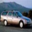

In [17]:
keras.preprocessing.image.array_to_img(x_train[0]*255.)

In [18]:
iterations = 10000
batch_size = 20
save_dir = './gan'

In [19]:
start = 0
for step in range(iterations):
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
    generated_images = generator.predict(random_latent_vectors)
    
    stop = start + batch_size
    real_images = x_train[start:stop]
    combined_images = np.concatenate([generated_images, real_images])
    labels = np.concatenate([
        np.ones((batch_size, 1)), 
        np.zeros((batch_size, 1))])
    labels += 0.05 * np.random.random(labels.shape)
    d_loss = discriminator.train_on_batch(combined_images, labels)
    
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
    misleading_targets = np.zeros((batch_size, 1))
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)
    
    start += batch_size
    if start > len(x_train) - batch_size:
        start = 0
    
    if step % 100 == 0:
        gan.save_weights('models/gan.h5')
        print('discriminator loss: ', d_loss)
        print('adversarial loss: ', a_loss)
        
        img = keras.preprocessing.image.array_to_img(generated_images[0] * 255.,scale=False)
        img.save(os.path.join(save_dir, 'generated_img' + str(step) + '.png'))
        
        img = keras.preprocessing.image.array_to_img(real_images[0] * 255.,scale=False)
        img.save(os.path.join(save_dir, 'real_img' + str(step) + '.png'))
        

W0419 10:05:42.724776 171240 training.py:2131] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


discriminator loss:  0.6817627
adversarial loss:  0.68498296
discriminator loss:  0.70677006
adversarial loss:  0.7218216
discriminator loss:  0.6910426
adversarial loss:  0.7746408
discriminator loss:  0.7054717
adversarial loss:  0.70951337
discriminator loss:  0.704112
adversarial loss:  0.76954114
discriminator loss:  0.7092732
adversarial loss:  0.96290225
discriminator loss:  0.70618474
adversarial loss:  0.7908902
discriminator loss:  0.70501465
adversarial loss:  0.75790775
discriminator loss:  0.69745874
adversarial loss:  0.8117298
discriminator loss:  0.7047971
adversarial loss:  0.8500973
discriminator loss:  0.7050698
adversarial loss:  0.80390626
discriminator loss:  0.703355
adversarial loss:  0.73567843
discriminator loss:  0.69697577
adversarial loss:  0.71096545
discriminator loss:  0.70255494
adversarial loss:  0.755379
discriminator loss:  0.6948449
adversarial loss:  0.7801098
discriminator loss:  0.7066632
adversarial loss:  0.7891054
discriminator loss:  0.691952

In [126]:
input_tensor = Input(shape=(2,2,1,))
#x = layers.Dense(10)(input_tensor)
#x = layers.Conv2D(1, 2)(input_tensor)
x = layers.Conv2DTranspose(1,3)(input_tensor)
model = models.Model(input_tensor, x)
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 2, 2, 1)]         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 4, 4, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [150]:
np.array([0,0,0,1,2,0,3,4,0]).dot(model.get_weights()[0].reshape(9)[::-1])

-0.5570464730262756

In [142]:
model.get_weights()[0].reshape(9)[::-1]

array([-0.324037  , -0.19854662, -0.44006208,  0.32107568, -0.41231918,
        0.4104722 , -0.49147338,  0.3552341 , -0.13237336], dtype=float32)

In [117]:
a = layers.Conv2D(3,1,input_shape=(3,3,))

In [138]:
model.predict(np.arange(1,5).reshape(-1,2,2,1))

array([[[[-0.13237336],
         [ 0.09048736],
         [ 0.2189948 ],
         [-0.98294675]],

        [[ 0.01335213],
         [ 0.944834  ],
         [-0.5570464 ],
         [-1.3237422 ]],

        [[ 0.79135466],
         [-0.67373943],
         [-1.40718   ],
         [ 0.63622874]],

        [[-1.3201863 ],
         [-2.3558881 ],
         [-1.7662975 ],
         [-1.296148  ]]]], dtype=float32)